In [75]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [76]:
# files to load
city_data_to_load = os.path.join("../Resources/city_data.csv")
ride_data_to_load = os.path.join("../Resources/ride_data.csv")

In [77]:
# Read the city data file an dstore in a pandas df
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [78]:
# read ride df and store
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [79]:
# count columns 
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [80]:
# get columns and the rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [81]:
# check types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [82]:
# check data points for each city (unique values)
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [83]:
# Get the number of data porinfs form Urban cities.
sum(city_data_df["type"]=="Rural")


18

In [84]:
# Get columns and rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [85]:
# Makes sure no nulls
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [86]:
# ride types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [87]:
# Combine data in to single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#Display the dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [88]:
# Create three separate dataframes
# Create the Urban City Dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [89]:
# create the Suburban and Rural city Dataframes.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [90]:
# get the number of rides for urban cities using groupby.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [91]:
# get the number of rides for suburban and rural cities using grouby.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [92]:
# get the average fare fr each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [93]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [94]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [95]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

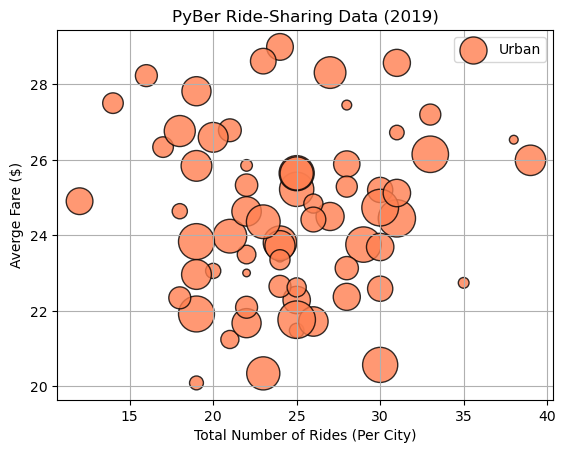

In [96]:
# Build the scatter plotd sfr urban citiies
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Averge Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()

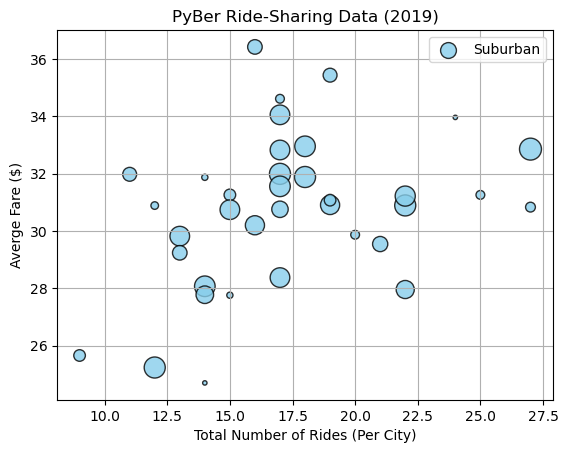

In [97]:
# Build the scatter plotd sfr suburban citiies
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Averge Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()

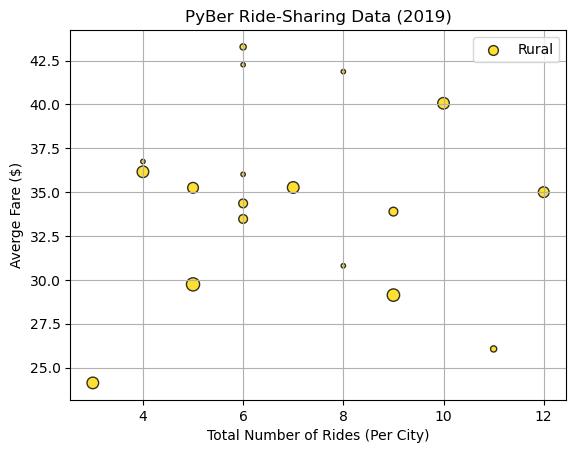

In [98]:
# Build the scatter plot rural citiies
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Averge Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()

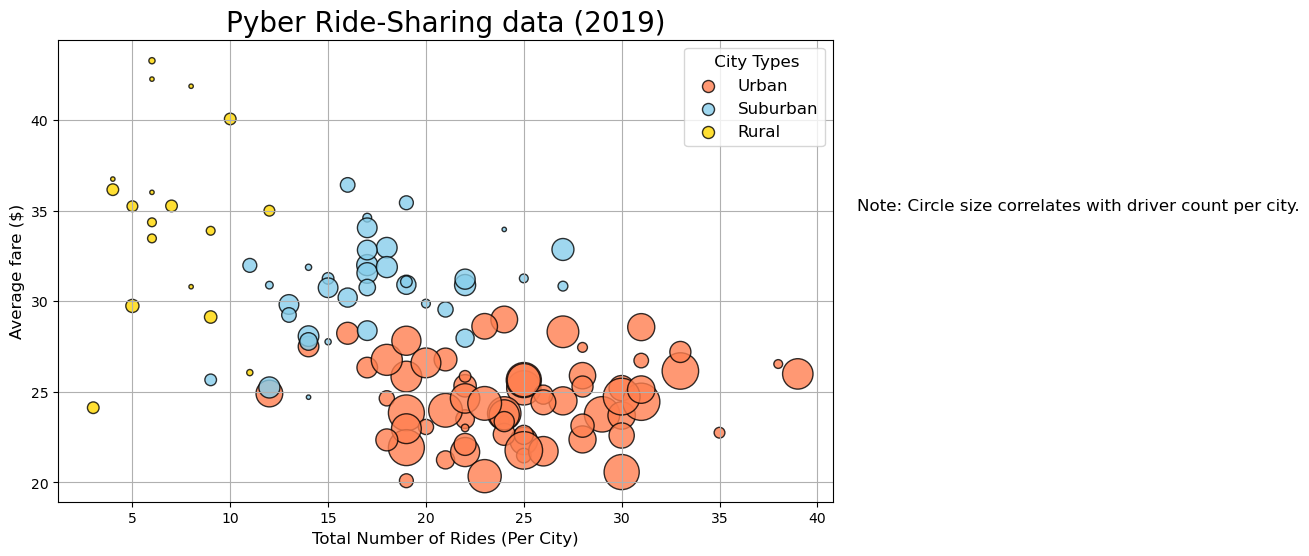

In [99]:
# Add scatter charts for each type of city.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

# Incorporate the other grpah properties
plt.title("Pyber Ride-Sharing data (2019)", fontsize=20)
plt.ylabel("Average fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#Add the legend
lgnd = plt.legend(fontsize="12", mode="Expandded", scatterpoints=1, loc="best", title=" City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12", wrap=True)

# Save the figure.
plt.savefig("Fig1.png")

plt.show()

In [100]:
# Get Summary statistics
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [101]:
#Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [102]:
#Calculate median
round(urban_ride_count.median(),2)

24.0

In [103]:
#Calculate mode
round(suburban_ride_count.mode(),2)

0    17
Name: ride_id, dtype: int64

In [104]:
import numpy as np
import scipy.stats as sts

In [105]:
# Calculate the measures of central tendancy for the ride count for urban citites.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean or the ride counts for urban trips is {mean_urban_ride_count}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean or the ride counts for urban trips is 24.62121212121212.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [106]:
# Calculate the measures of central tendancy for the ride count for Suburban citites.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean or the ride counts for suburban trips is {mean_suburban_ride_count}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean or the ride counts for suburban trips is 17.36111111111111.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [107]:
# Calculate the measures of central tendancy for the ride count for rural citites.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean or the ride counts for rural trips is {mean_rural_ride_count}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean or the ride counts for rural trips is 6.944444444444445.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [108]:
# Get the fares for urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [133]:
# Get the fares for suburban cities
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [134]:
# Get the fares for rural cities
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [109]:
# Calculate the measures of central tendency for the average fare for the urban citities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median for fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median for fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [111]:
# Create series for driver count data from the urban citities
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [112]:
# Create series for driver count data from the suburban citities
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [113]:
# Create series for driver count data from the rural citities
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [114]:
#calculate summary stats for urban cities using NumPy and SciPy.
mean_urban_driver_count = np.mean(urban_driver_count)
print(f"The mean driver counts for urban {mean_urban_driver_count}.")

median_urban_driver_count = np.median(urban_driver_count)
print(f"The median for driver count urban {median_urban_driver_count}.")

mode_urban_driver_count = sts.mode(urban_driver_count)
print(f"The mode for driver count urban is {mode_urban_driver_count}.")

The mean driver counts for urban 36.43939393939394.
The median for driver count urban 37.0.
The mode for driver count urban is ModeResult(mode=array([25.]), count=array([4])).


In [115]:
#calculate summary stats for suburban cities using NumPy and SciPy.
mean_suburban_driver_count = np.mean(suburban_driver_count)
print(f"The mean driver counts for suburban {mean_suburban_driver_count}.")

median_suburban_driver_count = np.median(suburban_driver_count)
print(f"The median for driver count suburban {median_suburban_driver_count}.")

mode_suburban_driver_count = sts.mode(suburban_driver_count)
print(f"The mode for driver count suburban is {mode_suburban_driver_count}.")

The mean driver counts for suburban 13.61111111111111.
The median for driver count suburban 15.0.
The mode for driver count suburban is ModeResult(mode=array([20.]), count=array([5])).


In [116]:
#calculate summary stats for rural cities using NumPy and SciPy.
mean_rural_driver_count = np.mean(rural_driver_count)
print(f"The mean driver counts for rural is {mean_rural_driver_count}.")

median_rural_driver_count = np.median(rural_driver_count)
print(f"The median for driver count rural is {median_rural_driver_count}.")

mode_rural_driver_count = sts.mode(rural_driver_count)
print(f"The mode for driver count rural is {mode_rural_driver_count}.")

The mean driver counts for rural is 4.333333333333333.
The median for driver count rural is 4.0.
The mode for driver count rural is ModeResult(mode=array([1.]), count=array([5])).


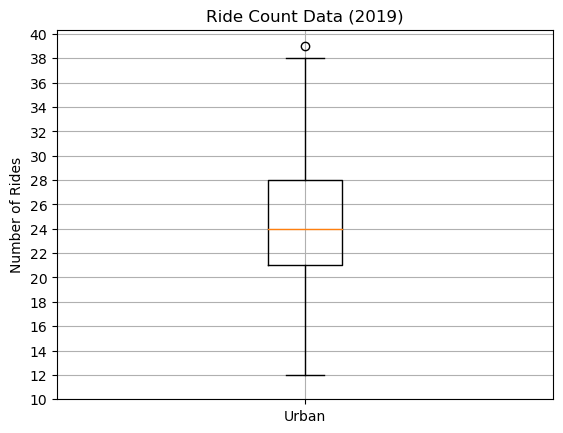

In [118]:
# Create BOX AND WHISKER plot for the urban ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y_axis lable and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

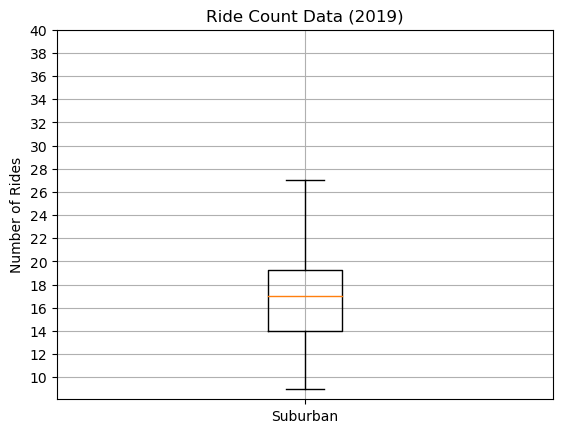

In [119]:
# Create BOX AND WHISKER plot for the suburban ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y_axis lable and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

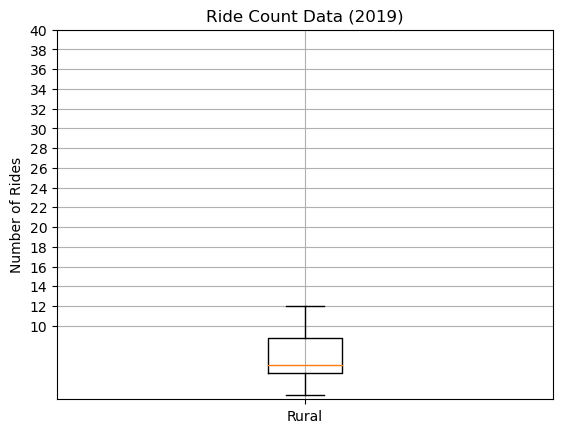

In [120]:
# Create BOX AND WHISKER plot for the rural ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y_axis lable and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

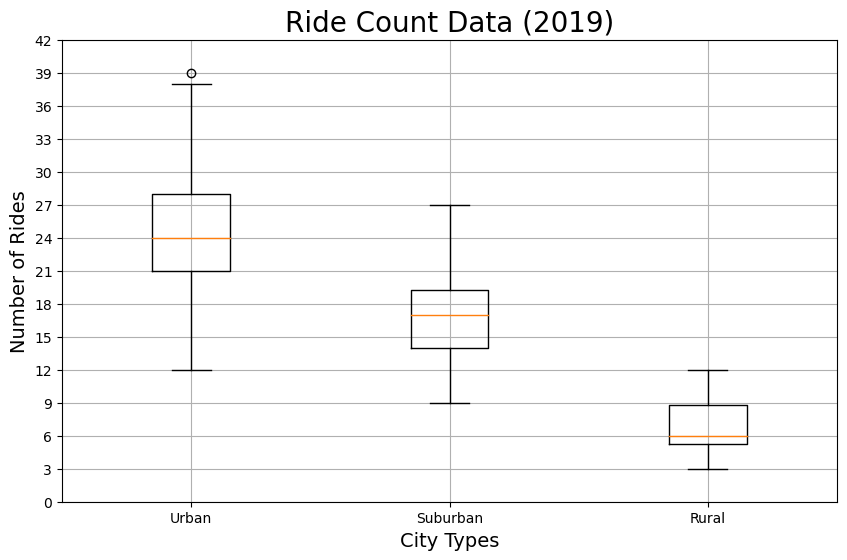

In [124]:
# Add all ride count box and whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Fig2.png")
plt.show()

In [125]:
# Get the city that matches 39 (the outlier)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


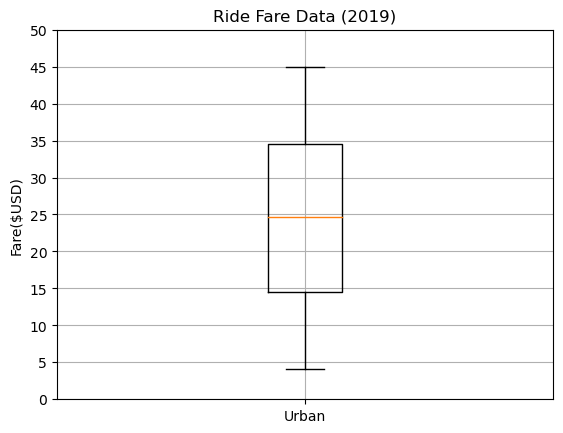

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [126]:
# Box and whisker for urban fare data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y_axis lable and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

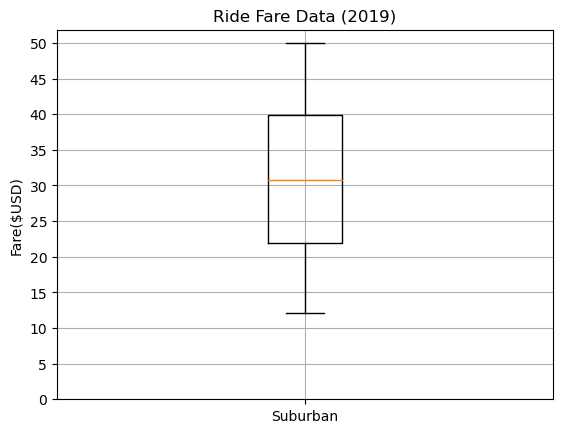

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [137]:
# Box and whisker for suburban fare data
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y_axis lable and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

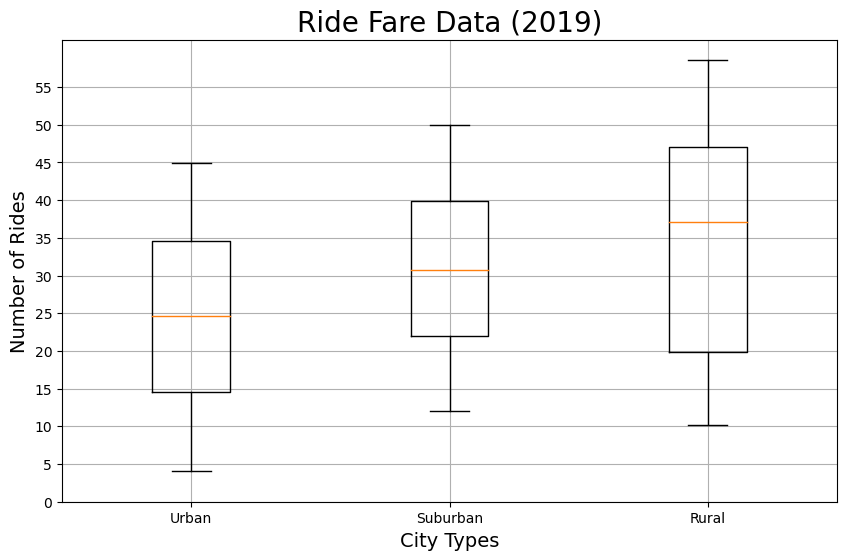

In [151]:
# Add all ride count box and whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("Fig3.png")
plt.show()

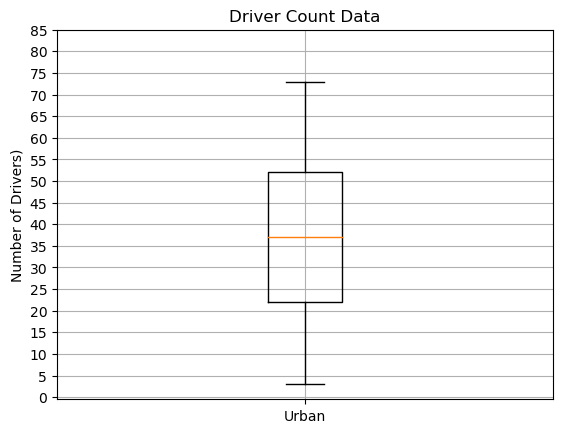

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [129]:
# Creat the box and whisker plot for urban driver count data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add title
ax.set_title('Driver Count Data')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()


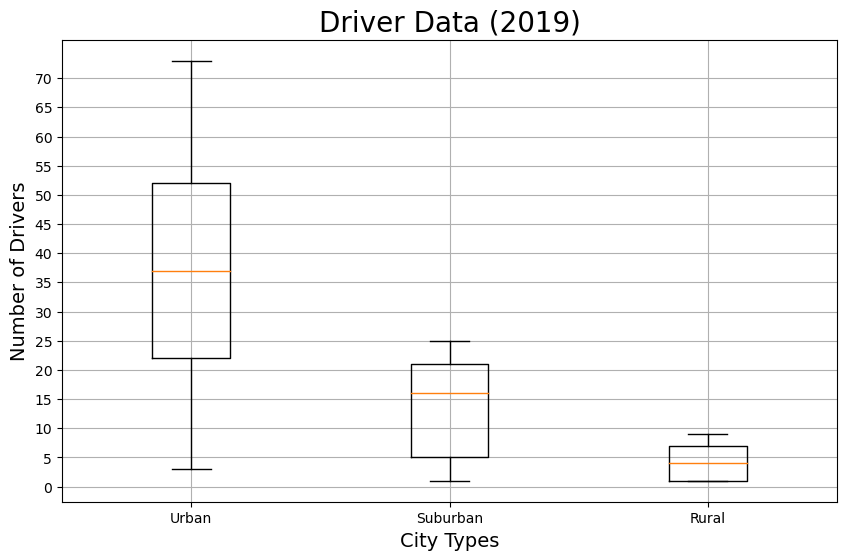

In [152]:
# Add all ride count box and whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(ride_driver_data, labels=x_labels)
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("Fig4.png")
plt.show()